In [2]:
import xarray as xr
import numpy as np
from dask.distributed import Client
import matplotlib as mpl
from carbon_math import carbon_flux
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy import stats
import xesmf as xe
from scipy.stats import linregress
import os

In [3]:
#Attempting a plotting function
def mean_trends_82_20(lmean,ltrend82,ltrend20,rmean,rtrend82,rtrend20,titles,ltrendmm=None,rtrendmm=None,ltrendm=None,rtrendm=None,l_conversion=1,r_conversion=1,meancolormap='bwr',figsize=(20,10)):
    '''
    lmean     xrarr
    ltrend82  xrarr
    ltrend82p xarr
    ltrend20  xrarr
    ltrend20p pval xarr
    
    rmean     xrarr
    rtrend82  xrarr
    rtrend82p pval xarr
    rtrend20  xrarr 
    rtrend20p pval xarr
    titles    array[1,2,3,4,5,6]
    l_conversion float
    r_conversion float
    meancolormap     str cmap (ie viridis)
    
    Will dynamically produce a 3 x 2 (6) subplot with mean on top and 82 and 2000 trends below. 
    Can produce for any trend variable (produce mean over time, need a flag for this?)
    
    '''
    
    plt.figure(figsize=figsize)
    plt.subplot(321)
    if type(ltrendm)==type(None):
        (lmean.mean(dim='time')*l_conversion).plot(cmap=meancolormap) 
    else:
        (lmean.mean(dim='time')*l_conversion).plot(vmin=ltrendm[1],vmax=ltrendm[0],cmap=meancolormap)
    plt.title(titles[0])
    #(((cafe_co2_mean.stf10.mean(dim='time')/1000)*86400)*-12)
    #plt.title('CAFE ens mean mean CO2 flux out of ocean (gC m2 day)')

    plt.subplot(322)
    if type(ltrendm)==type(None):
        (rmean.mean(dim='time')*r_conversion).plot(cmap=meancolormap) 
    else:
        (rmean.mean(dim='time')*r_conversion).plot(vmin=rtrendm[1],vmax=rtrendm[0],cmap=meancolormap)
    plt.title(titles[1])
    #(land_obs.fgco2_smoothed/365).mean(dim='time').plot(vmin=-0.15,vmax=0.15,cmap='bwr')
    #plt.title('Lanschutzer mean CO2 flux out of ocean (gC m2 day)')

    plt.subplot(323)
    if type(ltrendmm)==type(None):
        (ltrend82*l_conversion).plot(cmap='bwr')
    else:
        (ltrend82*l_conversion).plot(vmax=ltrendmm[1],vmin=ltrendmm[0],cmap='bwr')
    plt.title(titles[2])
    #((((cafe_co2_82tr.trend/1000)*86400)*-12*1000)).plot(vmax=3,vmin=-3,cmap='bwr')#(vmin=-0.15,vmax=0.15,cmap='bwr')
    #plt.title('CAFE CO2 flux longterm trends 1982-2020  (mgC/m2/day/year)')
    #plt.contourf(cafe_co2_82tr.pval.lon,cafe_co2_82tr.pval.lat,cafe_co2_82tr.pval.values,colors='none',hatches=['.'],levels=[0,0.05])   
 


    plt.subplot(324)
    if type(rtrendmm)==type(None):
        (rtrend82*r_conversion).plot(cmap='bwr')
    
    else:
        (rtrend82*r_conversion).plot(vmax=rtrendmm[1],vmin=rtrendmm[0],cmap='bwr')
    plt.title(titles[3])
    #((land_obs_tr_1982.trend)*1000).plot(vmax=3,vmin=-3,cmap='bwr')#(vmin=-0.15,vmax=0.15,cmap='bwr')
    #plt.title('Landshutzer CO2 flux longterm trends 1982-2020  (mgC/m2/day/year)')
    #plt.contourf(land_obs_tr_1982.pval.lon,land_obs_tr_1982.pval.lat,land_obs_tr_1982.pval.values,colors='none',hatches=['.'],levels=[0,0.05])   


    plt.subplot(325)
    if type(ltrendmm)==type(None):
        (ltrend20*l_conversion).plot(cmap='bwr')
    else:
        (ltrend20*l_conversion).plot(vmax=ltrendmm[1],vmin=ltrendmm[0],cmap='bwr')
    plt.title(titles[4])
    #((((cafe_co2_20tr.trend/1000)*86400)*-12*1000)).plot(vmax=3,vmin=-3,cmap='bwr')#(vmin=-0.15,vmax=0.15,cmap='bwr')
    #plt.title('CAFE CO2 flux longterm trends 2000-2020  (mgC/m2/day/year)')
    #plt.contourf(cafe_co2_20tr.pval.lon,cafe_co2_20tr.pval.lat,cafe_co2_20tr.pval.values,colors='none',hatches=['.'],levels=[0,0.05])   
    #plt.tight_layout()


    plt.subplot(326)
    if type(rtrendmm)==type(None):
        (rtrend20*r_conversion).plot(cmap='bwr')
    else:
        (rtrend20*r_conversion).plot(vmax=rtrendmm[1],vmin=rtrendmm[0],cmap='bwr')
    plt.title(titles[5])
    #((land_obs_tr_2000.trend)*1000).plot(vmax=3,vmin=-3,cmap='bwr')#(vmin=-0.15,vmax=0.15,cmap='bwr')
    #plt.title('Landshutzer CO2 flux longterm trends 2000-2020  (mgC/m2/day/year)')
    #plt.contourf(land_obs_tr_2000.pval.lon,land_obs_tr_2000.pval.lat,land_obs_tr_2000.pval.values,colors='none',hatches=['.'],levels=[0,0.05])   
    plt.tight_layout()
    plt.show()

In [15]:
phy_mean=xr.open_dataset('/scratch1/pit071/CAFE60/processed/eqpac/surface_phy_ensmean_1982.nc')
phy_trend82=xr.open_dataset('/scratch1/pit071/CAFE60/processed/eqpac/surface_phy_meantrends_1982.nc')
phy_trend20=xr.open_dataset('/scratch1/pit071/CAFE60/processed/eqpac/surface_phy_meantrends_2000.nc')
pprod_mean=xr.open_dataset('/scratch1/pit071/CAFE60/processed/eqpac/pprod_gross_2d_ensmean_1982.nc')
pprod_trend82=xr.open_dataset('/scratch1/pit071/CAFE60/processed/eqpac/pprod_gross_2d_meantrends_1982.nc')
pprod_trend20=xr.open_dataset('/scratch1/pit071/CAFE60/processed/eqpac/pprod_gross_2d_meantrends_2000.nc')


#LOAD CAFE SST AND CO2 FLUX
cafe_sst_mean=xr.open_dataset('/scratch1/pit071/CAFE60/processed/global/sst_ensmean_1982.nc')
cafe_sst_82tr=xr.open_dataset('/scratch1/pit071/CAFE60/processed/global/sst_meantrends_1982.nc')
cafe_sst_20tr=xr.open_dataset('/scratch1/pit071/CAFE60/processed/global/sst_meantrends_2000.nc')

cafe_co2_mean=xr.open_dataset('/scratch1/pit071/CAFE60/processed/global/stf10_ensmean_1982.nc')
cafe_co2_82tr=xr.open_dataset('/scratch1/pit071/CAFE60/processed/global/stf10_meantrends_1982.nc')
cafe_co2_20tr=xr.open_dataset('/scratch1/pit071/CAFE60/processed/global/stf10_meantrends_2000.nc')


#Load CO2 and SST OBS PRODUCTS
land_co2=xr.open_dataset('/scratch1/pit071/CAFE60/processed/obs/landshutzer_global_regrid.nc')
land_co2_82tr=xr.open_dataset('/scratch1/pit071/CAFE60/processed/obs/landshutzer_global_regrid_trend_1982.nc')
land_co2_20tr=xr.open_dataset('/scratch1/pit071/CAFE60/processed/obs/landshutzer_global_regrid_trend_2000.nc')

rey_sst=xr.open_dataset('/scratch1/pit071/CAFE60/processed/obs/sst.mnmean.regrid.global.nc')
rey_sst_82tr=xr.open_dataset('/scratch1/pit071/CAFE60/processed/obs/sst.mnmean.regrid.global.trend.1982.nc')
rey_sst_20tr=xr.open_dataset('/scratch1/pit071/CAFE60/processed/obs/sst.mnmean.regrid.global.trend.2000.nc')


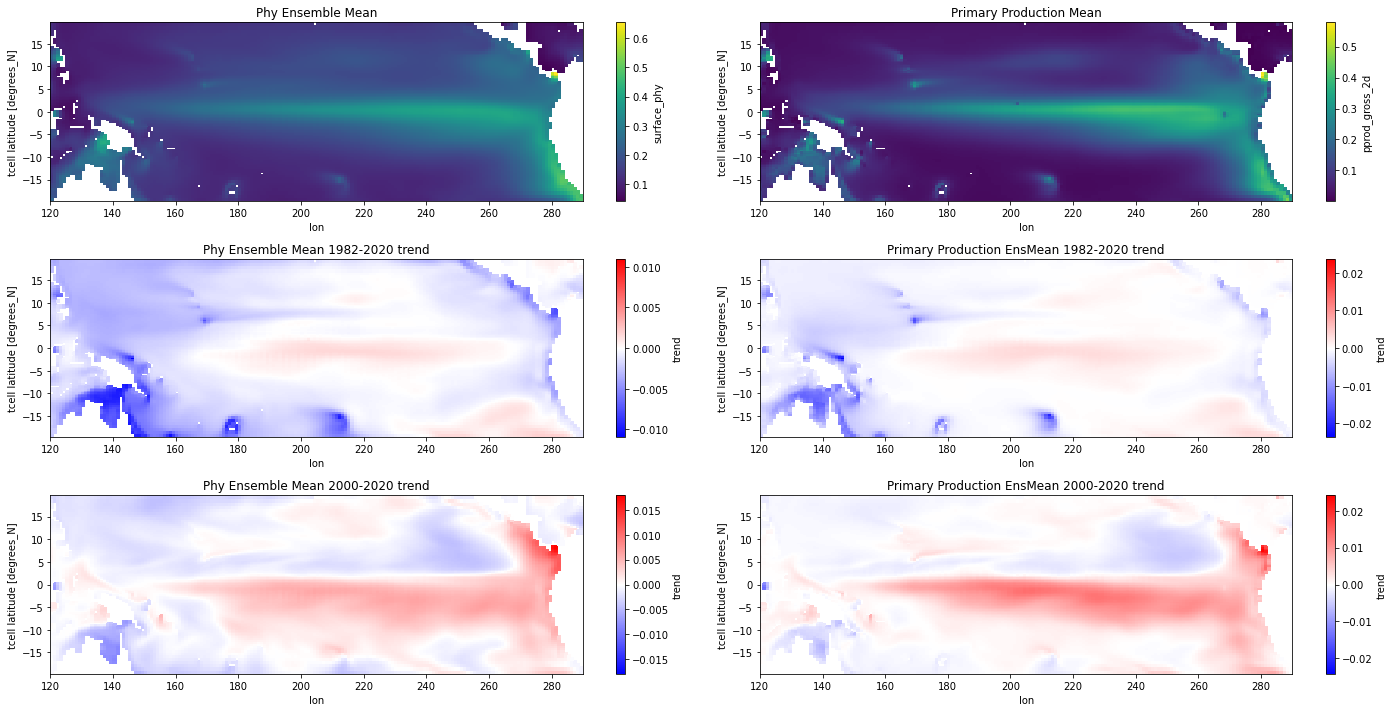

In [16]:
#Test the plotting function. Not super easy to use to be honest. 
titles=[
    'Phy Ensemble Mean',
    'Primary Production Mean',
    'Phy Ensemble Mean 1982-2020 trend',
    'Primary Production EnsMean 1982-2020 trend',
    'Phy Ensemble Mean 2000-2020 trend',
    'Primary Production EnsMean 2000-2020 trend']



mean_trends_82_20(lmean=phy_mean.surface_phy,
                  ltrend82=phy_trend82.trend,
                  ltrend20=phy_trend20.trend,
                  rmean=pprod_mean.pprod_gross_2d,
                  rtrend82=pprod_trend82.trend,
                  rtrend20=pprod_trend20.trend,
                  titles=titles,
                  ltrendmm=None,
                  rtrendmm=None,
                  ltrendm=None,
                  rtrendm=None,
                  l_conversion=1,
                  r_conversion=6.625*12*86400/1000,
                  meancolormap='viridis',
                  figsize=(20,10))

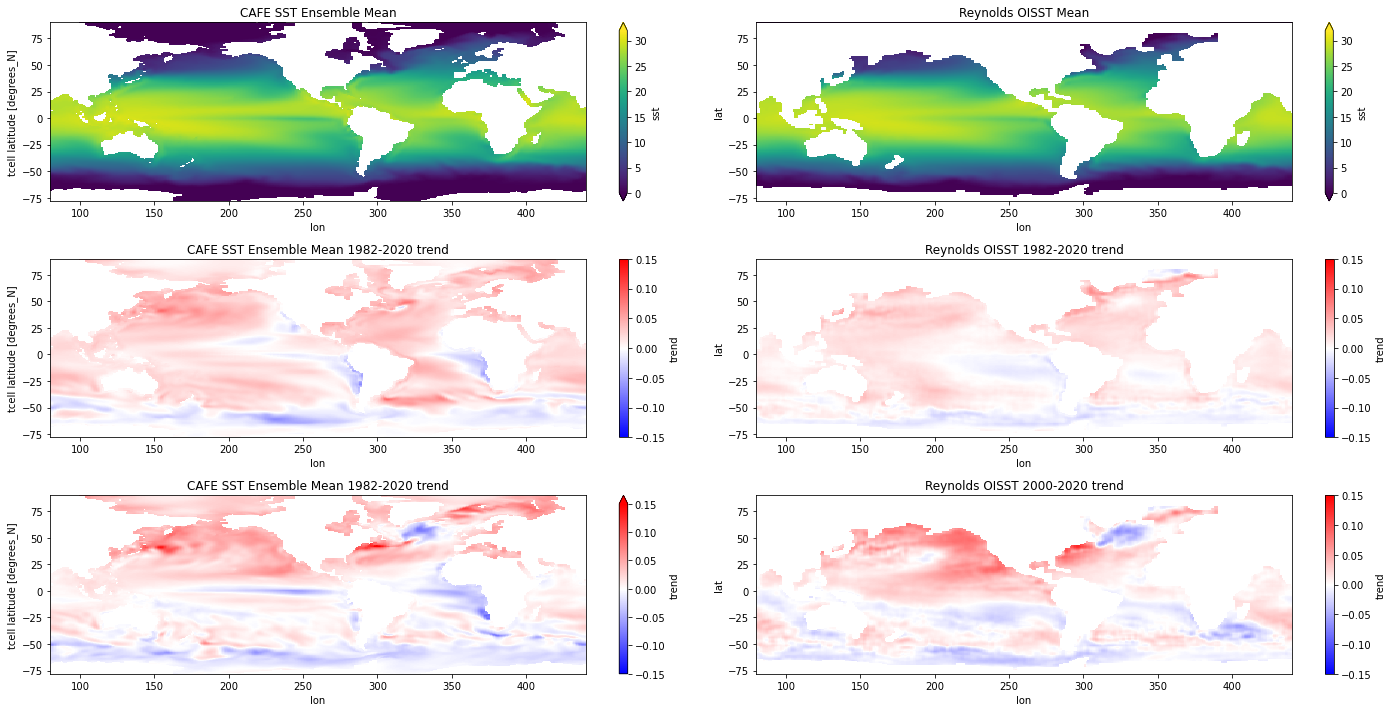

In [17]:
titles=[
    'CAFE SST Ensemble Mean',
    'Reynolds OISST Mean',
    'CAFE SST Ensemble Mean 1982-2020 trend',
    'Reynolds OISST 1982-2020 trend',
    'CAFE SST Ensemble Mean 1982-2020 trend',
    'Reynolds OISST 2000-2020 trend']

mean_trends_82_20(cafe_sst_mean.sst,cafe_sst_82tr.trend,cafe_sst_20tr.trend,rey_sst.sst,rey_sst_82tr.trend,rey_sst_20tr.trend,titles,[-0.15,0.15],[-0.15,0.15],[0,32],[0,32],1,1,'viridis')

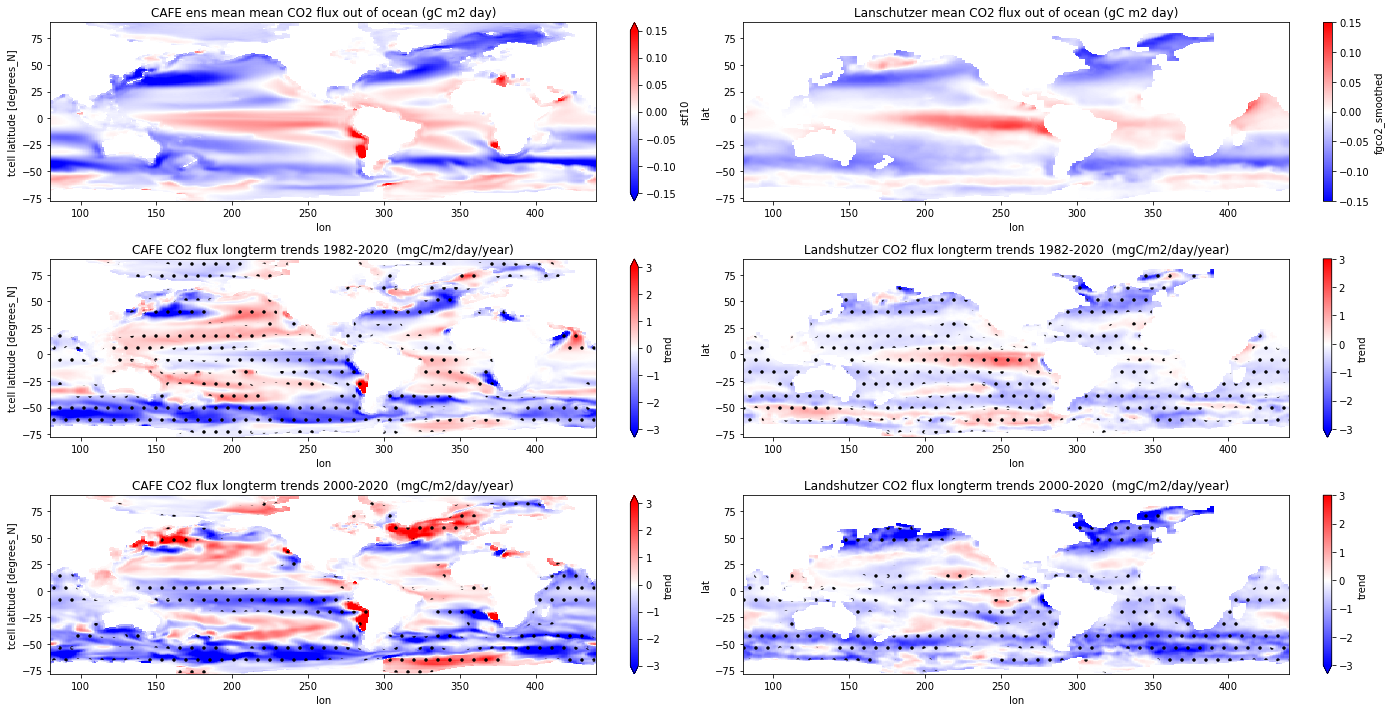

In [25]:
#CO2 FLUX mean and trends
plt.figure(figsize=(20,10))
plt.subplot(321)

(((cafe_co2_mean.stf10.mean(dim='time')/1000)*86400)*-12).plot(vmin=-0.15,vmax=0.15,cmap='bwr')
plt.title('CAFE ens mean mean CO2 flux out of ocean (gC m2 day)')

plt.subplot(322)
(land_co2.fgco2_smoothed/365).mean(dim='time').plot(vmin=-0.15,vmax=0.15,cmap='bwr')
plt.title('Lanschutzer mean CO2 flux out of ocean (gC m2 day)')

plt.subplot(323)
((((cafe_co2_82tr.trend/1000)*86400)*-12*1000)).plot(vmax=3,vmin=-3,cmap='bwr')#(vmin=-0.15,vmax=0.15,cmap='bwr')
plt.title('CAFE CO2 flux longterm trends 1982-2020  (mgC/m2/day/year)')
plt.contourf(cafe_co2_82tr.pval.lon,cafe_co2_82tr.pval.lat,cafe_co2_82tr.pval.values,colors='none',hatches=['.'],levels=[0,0.05])   
plt.tight_layout()


plt.subplot(324)
((land_co2_82tr.trend)*1000).plot(vmax=3,vmin=-3,cmap='bwr')#(vmin=-0.15,vmax=0.15,cmap='bwr')
plt.title('Landshutzer CO2 flux longterm trends 1982-2020  (mgC/m2/day/year)')
plt.contourf(land_co2_82tr.pval.lon,land_co2_82tr.pval.lat,land_co2_82tr.pval.values,colors='none',hatches=['.'],levels=[0,0.05])   
plt.tight_layout()


plt.subplot(325)
((((cafe_co2_20tr.trend/1000)*86400)*-12*1000)).plot(vmax=3,vmin=-3,cmap='bwr')#(vmin=-0.15,vmax=0.15,cmap='bwr')
plt.title('CAFE CO2 flux longterm trends 2000-2020  (mgC/m2/day/year)')
plt.contourf(cafe_co2_20tr.pval.lon,cafe_co2_20tr.pval.lat,cafe_co2_20tr.pval.values,colors='none',hatches=['.'],levels=[0,0.05])   
plt.tight_layout()


plt.subplot(326)
((land_co2_20tr.trend)*1000).plot(vmax=3,vmin=-3,cmap='bwr')#(vmin=-0.15,vmax=0.15,cmap='bwr')
plt.title('Landshutzer CO2 flux longterm trends 2000-2020  (mgC/m2/day/year)')
plt.contourf(land_co2_20tr.pval.lon,land_co2_20tr.pval.lat,land_co2_20tr.pval.values,colors='none',hatches=['.'],levels=[0,0.05])   
plt.tight_layout()
